In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/LIKELION_데이터분석/midproject/edu_data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 컬럼명 설명

*   Gender - 학생의 성별(명사: '남자' 또는 '여자')

*   Nationality - 학생의 국적(nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’ (쿠웨이트', '레바논', '이집트', '사우디아라비아', '미국', '요르단', '
베네수엘라', '이란', '튀니스', '모로코', '시리아', '팔레스타인', '이라크', '리비아'))

*   Place of birth: 학생의 출생지('쿠웨이트', '레바논', '이집트', '사우디아라비아', '미국', '요르단', '베네수엘라', '이란', '튀니스', '모로코', '시리아', '팔레스타인', '이라크', '리비아')

*  Educational Stages: 학생이 속한 교육 수준(명사: '하위 수준', '중학교', '고등학교')


*   Grade Levels: 학생이 속한 학년(명목: 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

*   Section ID: 학급 학생이 속한 반 (명사: 'A', 'B', 'C')
*   Topic: 과정 주제(명목: '영어', '스페인어', '프랑스어', '아랍어', 'IT', '수학', '화학', '생물학', '과학', '역사', '꾸란', '지질학')

*   Semester: 학년 학기 (명사: '1학기', '2학기')

*  Parent responsible for student: 학생에 대한 책임을 지는 부모 (명사: '엄마', '아빠')

*   Raised hand: 학생이 교실에서 손을 든 횟수 (숫자: 0-100)

*   Visited resource: 학생이 코스 콘텐츠를 방문한 횟수(숫자: 0-100)

*   Viewing announcements: 학생이 새 공지사항을 확인하는 횟수(숫자: 0-100)

* Discussion groups: 학생이 토론 그룹에 참여한 횟수(숫자: 0-100)

* Parent Answering Survey: 학부모가 학교에서 제공하는 설문조사에 응답하였는지 여부
(명사: 'Yes', 'No')

* Parent School Satisfaction: 학부모가 학교에 대해 느끼는 만족도(명목: '예', '아니오')

* Student Absence Days:학생 한 명당 결석일 수(명목: 7일 이상, 7일 미만)

# 가설 설정

## 가설1 - 참여도와 성적

* 학생들의 참여도가 높을수록 성적이 좋다

    * 현장 참여 - Raise hand, Discussion groups
    * 온라인 참여 - Visited resource, Viewing announcements

<ipython-input-50-7cbb10c43adb>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_means = df.groupby('Class')[['raisedhands', 'Discussion', 'VisITedResources', 'AnnouncementsView']].mean()
<ipython-input-50-7cbb10c43adb>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Average Count', hue='Category', data=engagement_means_melted, palette="muted", order=class_order, ci=None)


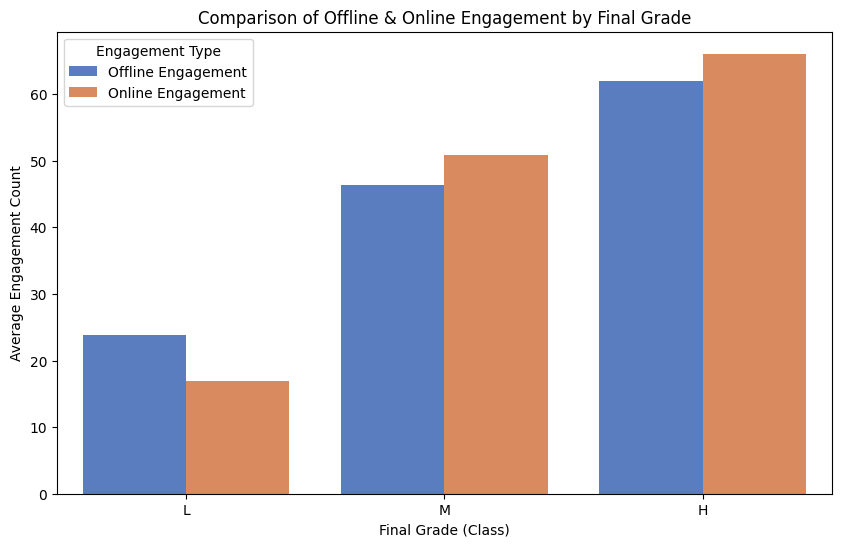

In [ ]:
# 성적(Class) 변환 (순서대로 정렬할 수 있도록 범주형으로 변환)
class_order = ['L', 'M', 'H']
df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)

# 성적(Class)에 따른 평균 참여도 비교
engagement_means = df.groupby('Class')[['raisedhands', 'Discussion', 'VisITedResources', 'AnnouncementsView']].mean()

# 데이터 변환 (melt)
engagement_means_melted = engagement_means.reset_index().melt(id_vars='Class', var_name='Engagement Type', value_name='Average Count')

# 오프라인 & 온라인 참여 그룹 구분
engagement_means_melted['Category'] = engagement_means_melted['Engagement Type'].apply(
    lambda x: 'Offline Engagement' if x in ['raisedhands', 'Discussion'] else 'Online Engagement'
)

# 막대 그래프 시각화 (X축을 L, M, H 순서로 정렬)
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Average Count', hue='Category', data=engagement_means_melted, palette="muted", order=class_order, ci=None)
plt.title("Comparison of Offline & Online Engagement by Final Grade")
plt.xlabel("Final Grade (Class)")
plt.ylabel("Average Engagement Count")
plt.legend(title="Engagement Type")
plt.show()


* 온라인에서의 참여도가 높은 학생일수록 성적이 좋다

<ipython-input-51-479d219fdb90>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='Average Count', hue='Category', data=engagement_gender_melted, palette="muted", ci=None)


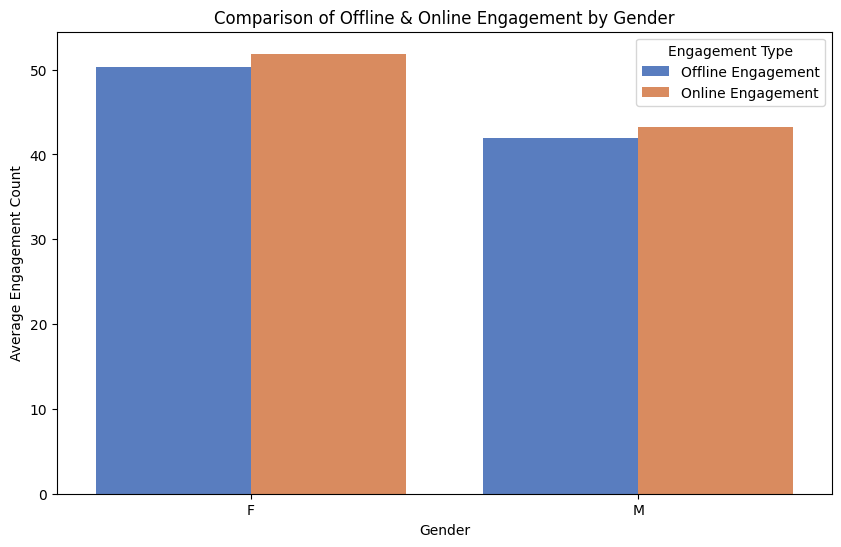

In [ ]:
# 성별(gender)과 참여 유형별 평균값 계산
engagement_gender_means = df.groupby('gender')[['raisedhands', 'Discussion', 'VisITedResources', 'AnnouncementsView']].mean()

# 데이터 변환 (melt)
engagement_gender_melted = engagement_gender_means.reset_index().melt(id_vars='gender', var_name='Engagement Type', value_name='Average Count')

# 오프라인 & 온라인 참여 그룹 구분
engagement_gender_melted['Category'] = engagement_gender_melted['Engagement Type'].apply(
    lambda x: 'Offline Engagement' if x in ['raisedhands', 'Discussion'] else 'Online Engagement'
)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Average Count', hue='Category', data=engagement_gender_melted, palette="muted", ci=None)
plt.title("Comparison of Offline & Online Engagement by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Engagement Count")
plt.legend(title="Engagement Type")
plt.show()


In [ ]:
df['gender'].value_counts()

,count
gender,
M,305
F,175


남학생의 데이터가 여학생의 데이터보다 2배 더 많지만, 참여 수는 여학생이 더 많아보임
> 그렇다면 여학생의 성적이 남학생의 성적보다 더 좋을까?



---



## 가설2 - 성별과 성적
여학생의 성적이 남학생의 성적보다 더 좋을것이다

<ipython-input-53-84e4f2b24509>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class_counts = df.groupby(['Class', 'gender']).size().reset_index(name='Count')
<ipython-input-53-84e4f2b24509>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = gender_class_counts.groupby('Class')['Count'].transform('sum')


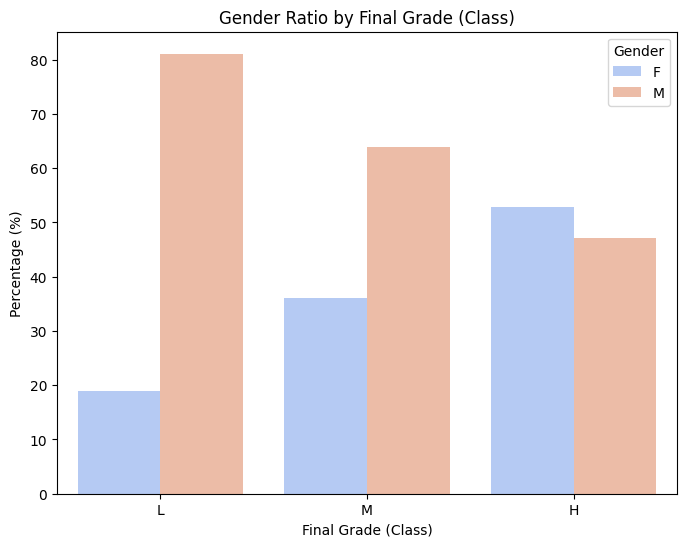

In [ ]:
# 성적(Class)별 남녀 비율 계산
gender_class_counts = df.groupby(['Class', 'gender']).size().reset_index(name='Count')

# 성적(Class)별 총 학생 수 계산 후, 남녀 비율 계산
total_counts = gender_class_counts.groupby('Class')['Count'].transform('sum')
gender_class_counts['Percentage'] = (gender_class_counts['Count'] / total_counts) * 100

# 성적(Class)을 L, M, H 순서로 정렬
class_order = ['L', 'M', 'H']
gender_class_counts['Class'] = pd.Categorical(gender_class_counts['Class'], categories=class_order, ordered=True)

# 막대 그래프 시각화 (성적별 남녀 비율)
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Percentage', hue='gender', data=gender_class_counts, palette="coolwarm")
plt.title("Gender Ratio by Final Grade (Class)")
plt.xlabel("Final Grade (Class)")
plt.ylabel("Percentage (%)")
plt.legend(title="Gender")
plt.show()


<ipython-input-54-8a8682961117>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_class_counts = df.groupby(['StageID', 'Class']).size().reset_index(name='Count')


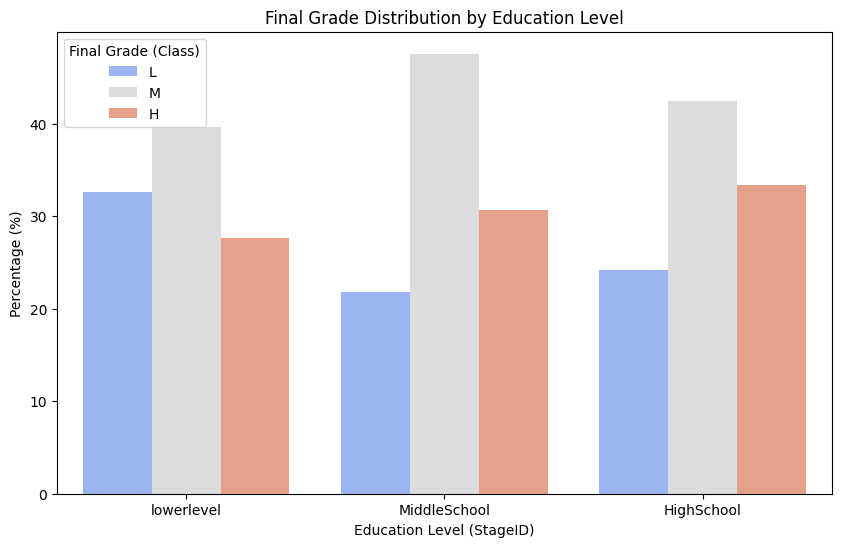

In [ ]:
# 교육 수준(StageID)별 최종 성적(Class) 분포 확인
stage_class_counts = df.groupby(['StageID', 'Class']).size().reset_index(name='Count')

# 교육 수준(StageID) 내에서 각 성적(Class) 비율 계산
total_counts = stage_class_counts.groupby('StageID')['Count'].transform('sum')
stage_class_counts['Percentage'] = (stage_class_counts['Count'] / total_counts) * 100

# 교육 수준(StageID) 순서 정렬
stage_order = ['lowerlevel', 'MiddleSchool', 'HighSchool']
stage_class_counts['StageID'] = pd.Categorical(stage_class_counts['StageID'], categories=stage_order, ordered=True)

# 1. 교육 수준별 최종 성적 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='StageID', y='Percentage', hue='Class', data=stage_class_counts, palette="coolwarm")
plt.title("Final Grade Distribution by Education Level")
plt.xlabel("Education Level (StageID)")
plt.ylabel("Percentage (%)")
plt.legend(title="Final Grade (Class)")
plt.show()

In [ ]:
# 교육 수준(StageID)별 남녀 학생 수 집계
stage_gender_counts_table = df.groupby(['StageID', 'gender']).size().reset_index(name='Count')

# 교육 수준(StageID) 순서 정렬
stage_order = ['lowerlevel', 'MiddleSchool', 'HighSchool']
stage_gender_counts_table['StageID'] = pd.Categorical(stage_gender_counts_table['StageID'], categories=stage_order, ordered=True)

# 데이터프레임 출력
stage_gender_counts_table.sort_values(by=['StageID', 'gender'])


,StageID,gender,Count
4,lowerlevel,F,78
5,lowerlevel,M,121
2,MiddleSchool,F,82
3,MiddleSchool,M,166
0,HighSchool,F,15
1,HighSchool,M,18




---



## 가설3 - 과목과 성적
수강하는 과목에 따라 최종성적이 달라진다.

- 이과 과목을 수강하는 학생들이 성적이 더 좋을 것 같다

   > 이과 수업은 남학생들이 더 많이 들을까?
    
    > 여학생들의 성적이 더 좋으면 문과생들의 성적이 더 좋은가?

- 출생지에 따라 선택하는 과목이 달라진다.

    >그러면 출생지에 따라 최종성적도 달라지나?

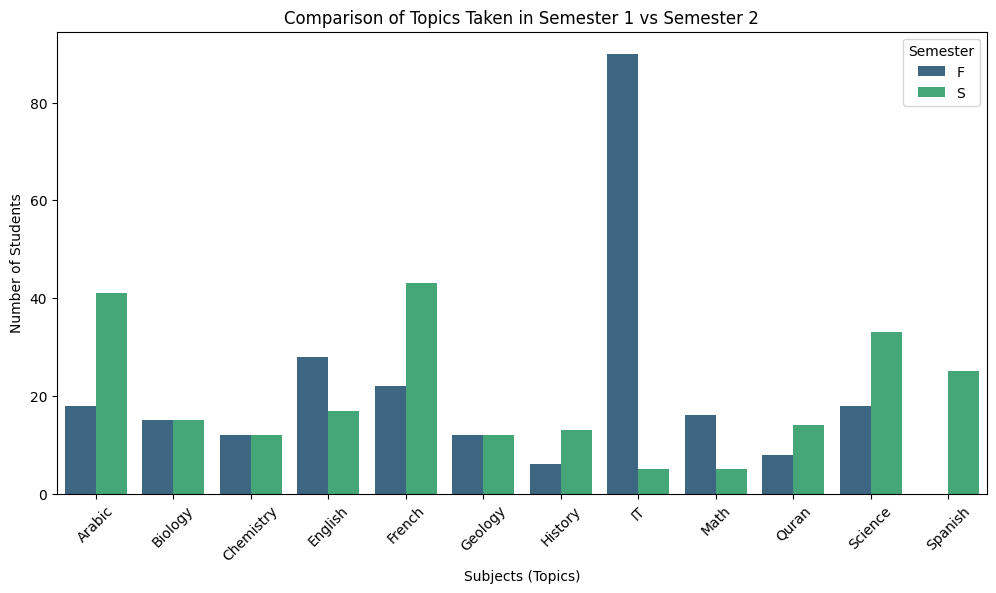

In [ ]:
# 학기(Semester)별 과목(Topic) 분포 확인
semester_topic_counts = df.groupby(['Semester', 'Topic']).size().reset_index(name='Count')

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='Count', hue='Semester', data=semester_topic_counts, palette="viridis")
plt.title("Comparison of Topics Taken in Semester 1 vs Semester 2")
plt.xlabel("Subjects (Topics)")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)  # X축 레이블 가독성을 위해 회전
plt.legend(title="Semester")
plt.show()


<ipython-input-57-3430387484d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  semester_topic_class_counts = df.groupby(['Semester', 'Topic', 'Class']).size().reset_index(name='Count')
<ipython-input-57-3430387484d4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Topic', y='Count', hue='Class', data=semester_topic_class_counts, palette="coolwarm", ci=None)


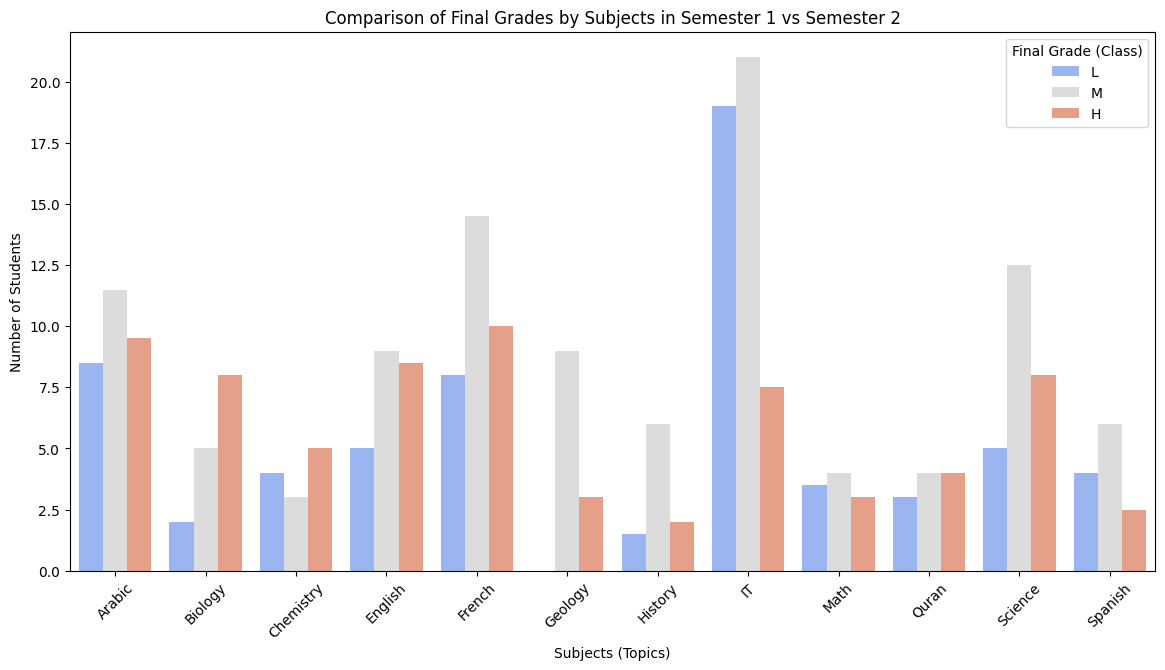

In [ ]:
# 학기(Semester), 과목(Topic), 성적(Class)별 학생 수 집계
semester_topic_class_counts = df.groupby(['Semester', 'Topic', 'Class']).size().reset_index(name='Count')

# 막대 그래프 시각화 (과목별 성적 분포를 학기별로 비교)
plt.figure(figsize=(14, 7))
sns.barplot(x='Topic', y='Count', hue='Class', data=semester_topic_class_counts, palette="coolwarm", ci=None)

plt.title("Comparison of Final Grades by Subjects in Semester 1 vs Semester 2")
plt.xlabel("Subjects (Topics)")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)  # X축 레이블 가독성을 위해 회전
plt.legend(title="Final Grade (Class)")
plt.show()


In [ ]:
science_subjects = ['Biology', 'Chemistry', 'Physics', 'Geology', 'Math', 'IT', 'Science']
arts_subjects = ['History', 'Geography', 'English', 'French', 'Spanish', 'Arabic', 'Quran']
df['Subject Type'] = df['Topic'].apply(lambda x: 'Science' if x in science_subjects else ('Arts' if x in arts_subjects else 'Other'))

<ipython-input-59-74dbfa55d00f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subject_type_class_counts = df.groupby(['Subject Type', 'Class']).size().reset_index(name='Count')


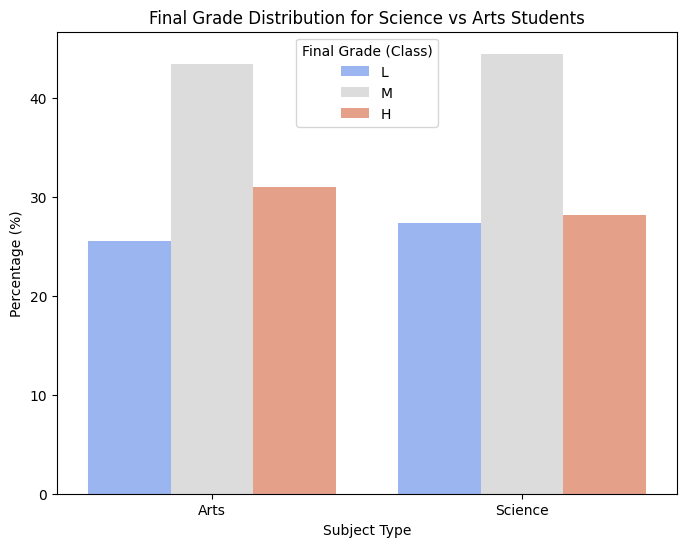

In [ ]:
# 이과(Science) vs 문과(Arts) 학생들의 최종 성적 분포 비교
subject_type_class_counts = df.groupby(['Subject Type', 'Class']).size().reset_index(name='Count')

# 각 과목 유형 내에서 성적(Class) 비율 계산
total_counts = subject_type_class_counts.groupby('Subject Type')['Count'].transform('sum')
subject_type_class_counts['Percentage'] = (subject_type_class_counts['Count'] / total_counts) * 100

# 막대 그래프 시각화 (이과 vs 문과 학생들의 성적 비교)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Subject Type', y='Percentage', hue='Class', data=subject_type_class_counts, palette="coolwarm")

plt.title("Final Grade Distribution for Science vs Arts Students")
plt.xlabel("Subject Type")
plt.ylabel("Percentage (%)")
plt.legend(title="Final Grade (Class)")
plt.show()


---

# EDA

## 데이터 탐색

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject Type
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Science
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Science
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,Science
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,Science
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,Science


In [ ]:
# 결측치 확인 - 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    object  
 1   NationalITy               480 non-null    object  
 2   PlaceofBirth              480 non-null    object  
 3   StageID                   480 non-null    object  
 4   GradeID                   480 non-null    object  
 5   SectionID                 480 non-null    object  
 6   Topic                     480 non-null    object  
 7   Semester                  480 non-null    object  
 8   Relation                  480 non-null    object  
 9   raisedhands               480 non-null    int64   
 10  VisITedResources          480 non-null    int64   
 11  AnnouncementsView         480 non-null    int64   
 12  Discussion                480 non-null    int64   
 13  ParentAnsweringSurvey     480 non-null    object  

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.describe(include=['object','category'])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject Type
count,480,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3,2
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M,Science
freq,305,179,180,248,147,283,95,245,283,270,292,289,211,245


In [ ]:
# 중복행 확인 - 없음
df[df.duplicated()]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject Type
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L,Arts
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L,Arts


## 데이터 시각화

이상치 탐색

정규화는 필요없다고 판단
- 단위 통일되어있음
- 변수마다 값의 범위가 크게 차이나지 않음

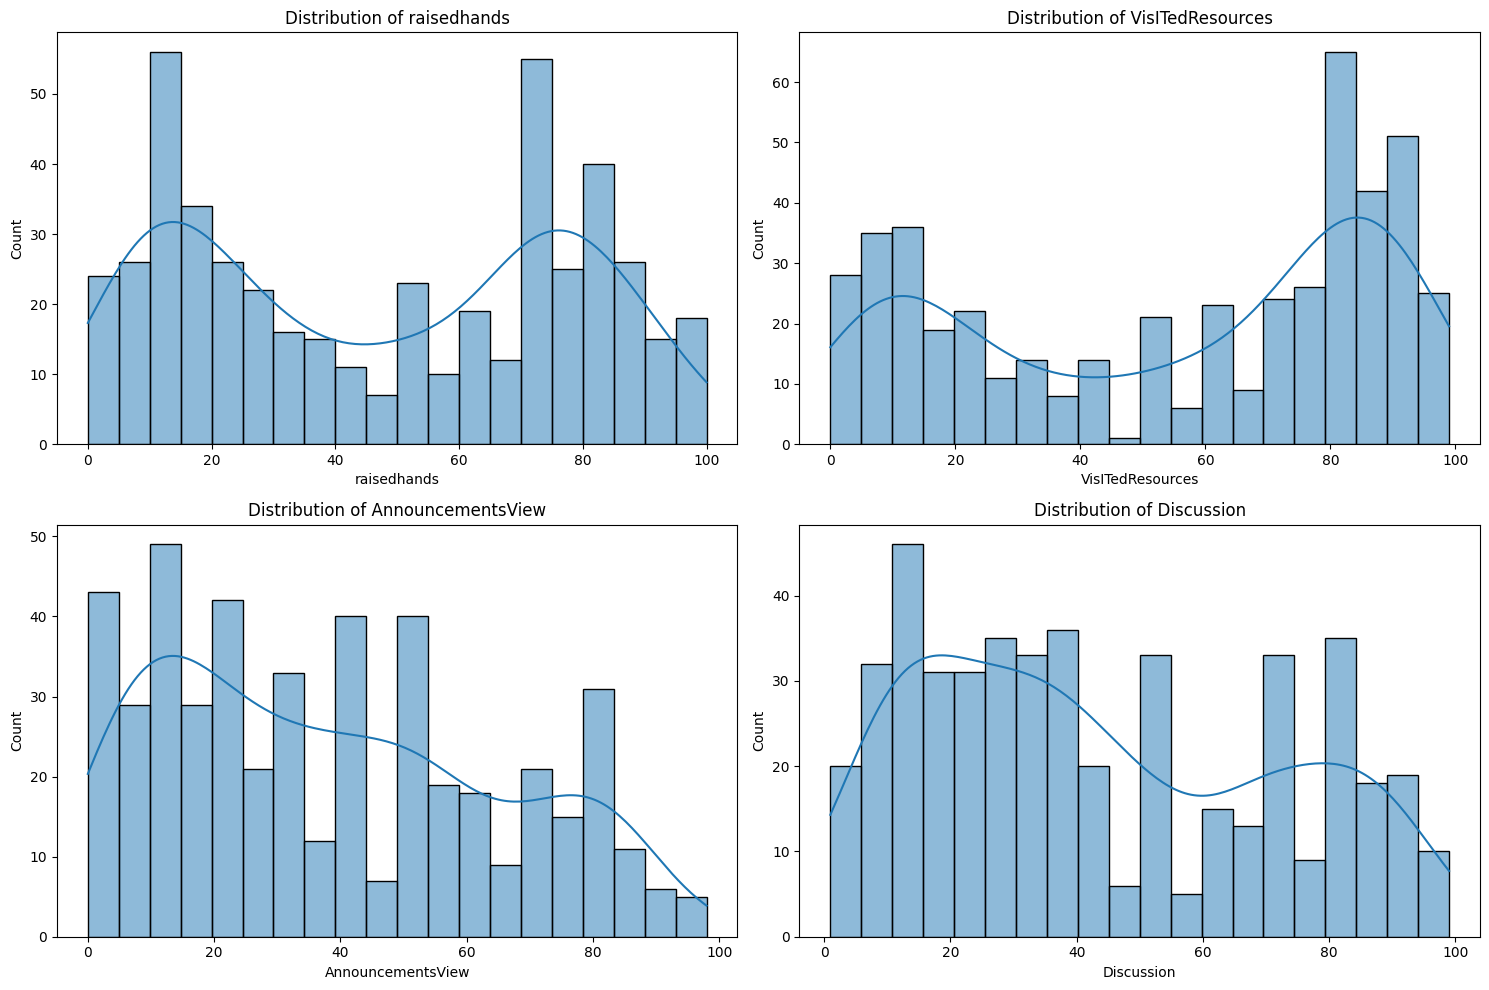

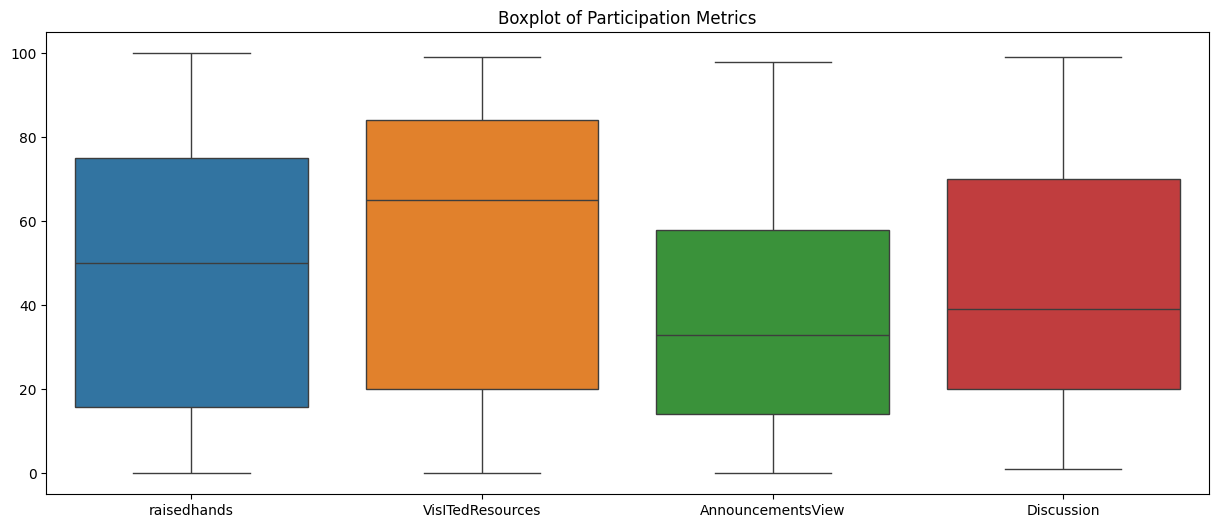

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
plt.figure(figsize=(15, 10))

# 참여도 지표 히스토그램
participation_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for i, col in enumerate(participation_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

# 그래프 출력
plt.tight_layout()
plt.show()

# 박스플롯 시각화
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[participation_cols])
plt.title('Boxplot of Participation Metrics')
plt.show()


- AnnouncementView과 Discussion은 왼쪽에 집중되어 있음 → 학생들의 공지 확인율과 토론의 참여도가 비교적 낮은 편

# 가설검증

## 가설1 참여도와 성적

### 1-1 학생들의 참여도별 성적 비교

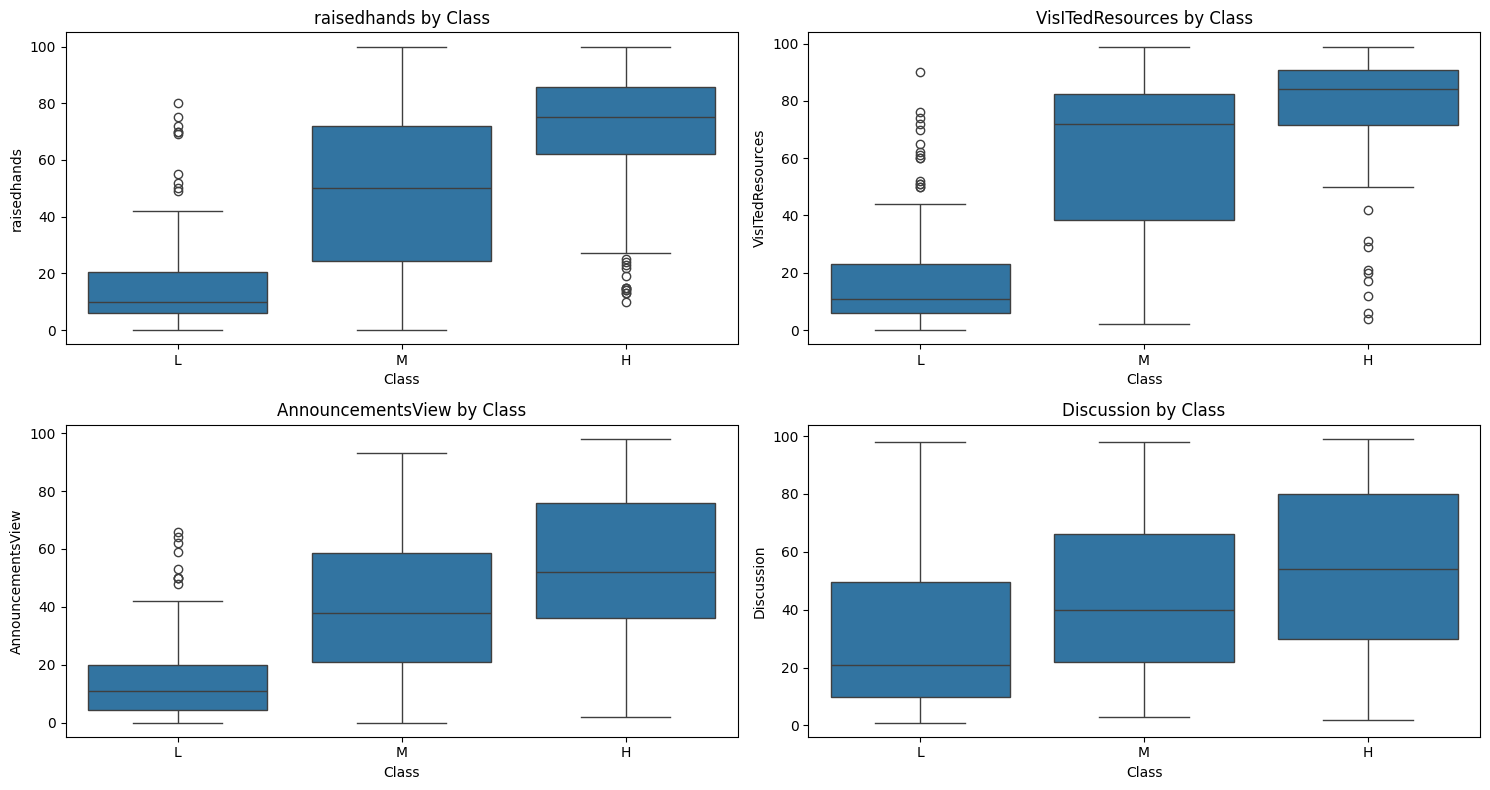

In [ ]:
# 성적(Class)에 따른 참여도 차이 박스플롯
plt.figure(figsize=(15, 8))
for i, col in enumerate(participation_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["Class"], y=df[col], order=["L", "M", "H"])
    plt.title(f'{col} by Class')

plt.tight_layout()
plt.show()

수업의 참여도가 많으면 많을수록 좋은 성적을 보이는 것을 알 수 있다. 성적이 높은 학생들은 수업 참여도 중 온라인 리소스를 가장 많이 활용하는 경향이 있다.(중앙값이 가장 높음)

하지만 각각의 이상치를 통해 다음과 같은 사실도 알 수 있다.

- 성적이 낮은 학생 중에서도 수업 참여율이 높은 학생들이 있으며 성적이 높은 학생 중에서도 수업 참여율이 낮은 학생들이 있다. 특히 raised hand, visitedresource, announceview에서 이와 같은 현상이 두드러진다.



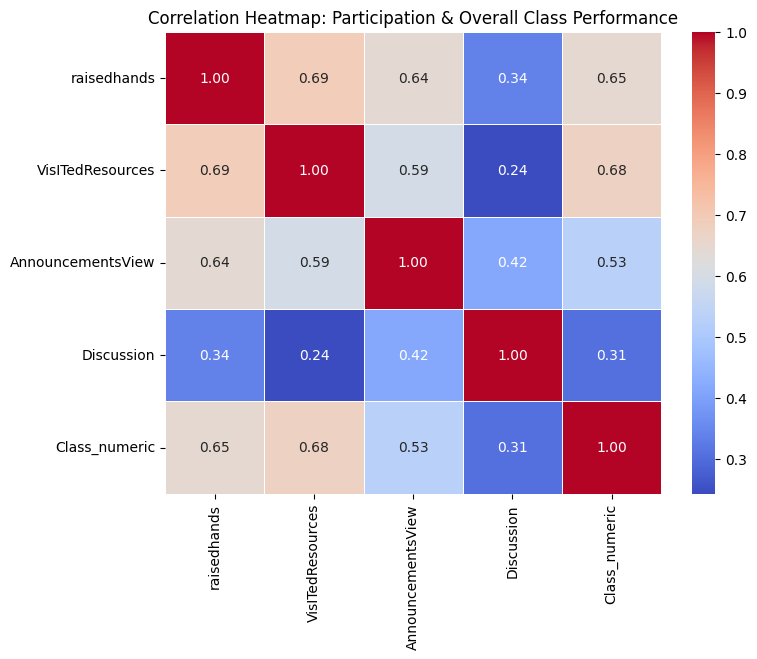

In [ ]:
# 성적(Class)을 수치형으로 변환 (H:2, M:1, L:0)
df["Class_numeric"] = df["Class"].map({"L": 0, "M": 1, "H": 2})

# 참여도 관련 변수 선택
correlation_cols = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion", "Class_numeric"]

# 상관행렬 계산 (Class 전체와 참여도 간 관계)
correlation_matrix = df[correlation_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Participation & Overall Class Performance")
plt.show()


#### **결론1-1**(모든 학생의 성적과 참여도 간의 상관관계)
---
1위. VisITedResources(0.68)

2위.  raisedhands(0.65)
로 위의 두 변수가 성적과의 강한 상관관계를 보이고 있다.

온라인리소스 활용이 성적에 가장 큰 영향을 주는 요소라고 해석할 수 있음

**즉, 온라인 학습의 적극 활용 + 수업시간에 손을 많이 드는 것이 좋은 성적과 연관이 있다**

###1-1+ 성적이 좋은 학생들 중 참여도가 낮은 학생들의 특징 조회

In [ ]:
h_class_students = df[df["Class"] == "H"]

visited_q1 = h_class_students["VisITedResources"].quantile(0.25)
visited_q3 = h_class_students["VisITedResources"].quantile(0.75)
IQR = visited_q3 - visited_q1
lower_bound = visited_q1 - 0.5 * IQR

low_visited_students=h_class_students[h_class_students['VisITedResources'] <= lower_bound ]
low_visited_students[["VisITedResources", "raisedhands", "AnnouncementsView", "Discussion"]]

,VisITedResources,raisedhands,AnnouncementsView,Discussion
19,50,70,40,99
47,4,70,39,90
86,12,70,40,50
96,60,14,11,75
117,29,25,40,17
155,58,70,73,91
168,52,60,23,33
170,62,40,83,33
176,52,60,23,33
178,42,80,33,13


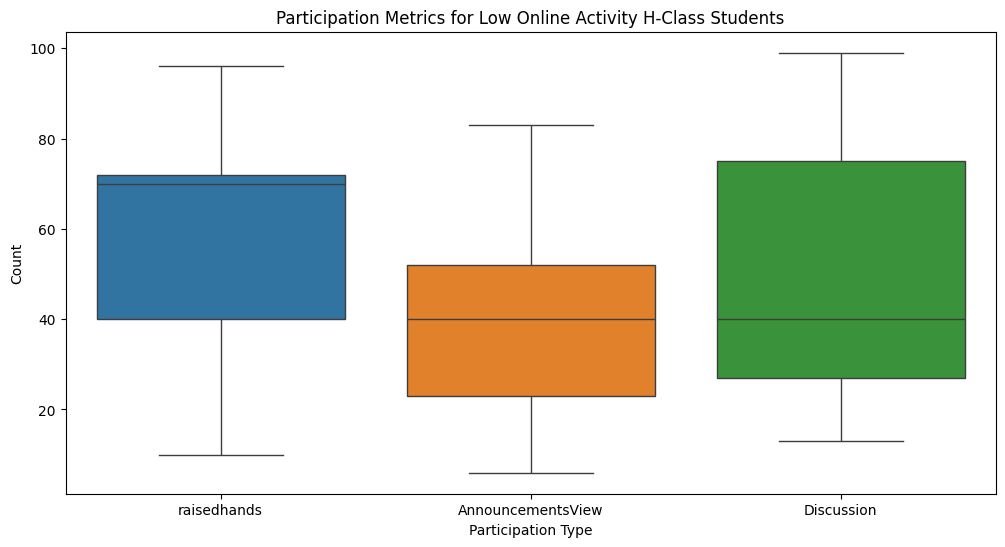

In [ ]:
import matplotlib.pyplot as plt

# 데이터 비교를 위한 박스플롯 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_visited_students[["raisedhands", "AnnouncementsView", "Discussion"]])
plt.title("Participation Metrics for Low Online Activity H-Class Students")
plt.xlabel("Participation Type")
plt.ylabel("Count")
plt.show()

**성적이 좋지만 온라인 리소스를 적게 활용**하는 학생들은 **DISCUSSION 에 많이 참여**하고 있다는 것을 확인할 수 있었다

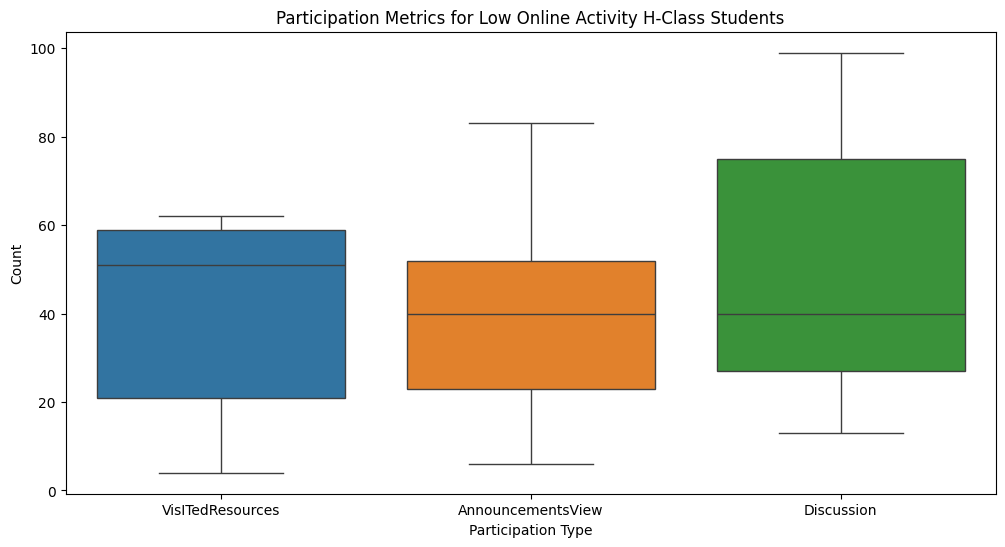

In [ ]:
raised_q1 = h_class_students["raisedhands"].quantile(0.25)
raised_q3 = h_class_students["raisedhands"].quantile(0.75)
IQR = raised_q3 - raised_q1
lower_bound = raised_q1 - 0.5 * IQR

low_raised_students=h_class_students[h_class_students['raisedhands'] <= lower_bound ]

plt.figure(figsize=(12, 6))
sns.boxplot(data=low_visited_students[["VisITedResources", "AnnouncementsView", "Discussion"]])
plt.title("Participation Metrics for Low Online Activity H-Class Students")
plt.xlabel("Participation Type")
plt.ylabel("Count")
plt.show()

높은 성적이지만 손들기 횟수가 적은 학생들 또한 discusson에 참여한 횟수가 많다

→ 참여 중에 DISCUSSION에 얼마나 많이 참여하느냐가 성적에 좋은 영향을 준다??

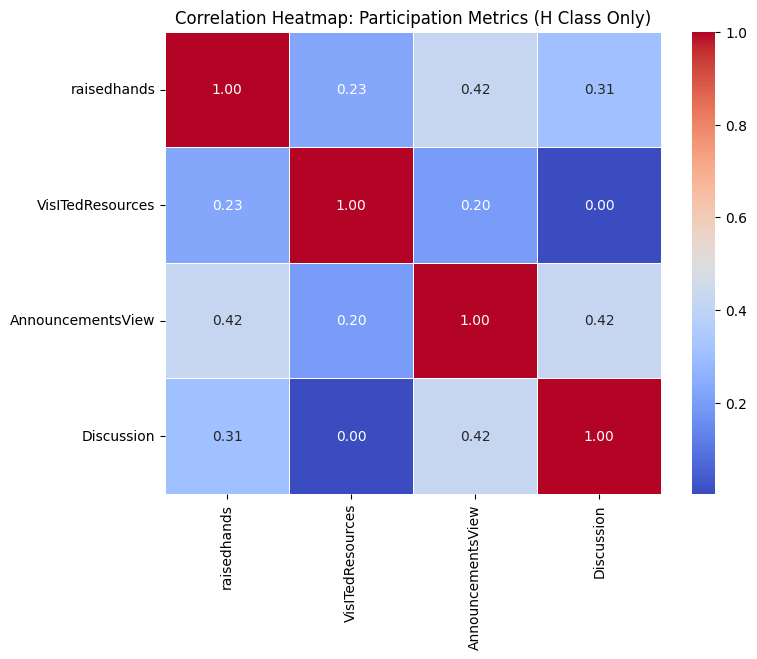

In [ ]:
# H클래스 학생들만 필터링
h_class_df = df[df["Class"] == "H"]

# H클래스 학생들의 참여도 변수 간 상관행렬 계산
h_class_correlation = h_class_df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(h_class_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Participation Metrics (H Class Only)")
plt.show()

#### **결론1-2**(높은 성적의 학생들의 참여도 간의 상관관계)
---


일부 H클래스 학생들은 온라인 학습(VisitedResources)이나 손 들기(Raisedhands)를 적게 했음에도 높은 성적을 유지했다.

특정한 학습 참여의 형태가 높은 성적에 영향을 미쳤다고 볼 수는 없고, 학습 참여 형태외의 다른 변수들로부터의 영향에 대해 추가적인 분석이 필요해보임

In [ ]:
# Class 1 학생 중 VisITedResources가 적은 학생
Q1 = df[df['Class'] == 1]['VisITedResources'].quantile(0.25)
Q3 = df[df['Class'] == 1]['VisITedResources'].quantile(0.75)
IQR = Q3 - Q1

df_outliers_VisITedResources = df[
    (df['Class'] == 1) &
    (df['VisITedResources'] < (Q1 - 1.5 * IQR))]  # 이상치 기준 적용

In [ ]:
# Class 1 학생 중 raisedhands가 적은 학생
Q1 = df[df['Class'] == 1]['raisedhands'].quantile(0.25)
Q3 = df[df['Class'] == 1]['raisedhands'].quantile(0.75)
IQR = Q3 - Q1

df_outliers_raisedhands = df[
    (df['Class'] == 1) &
    (df['raisedhands'] < (Q1 - 1.5 * IQR))]  # 이상치 기준 적용

In [ ]:
# 두 데이터프레임의 공통 학생 찾기(교집합)
df_outliers_common = df_outliers_VisITedResources.merge(df_outliers_raisedhands, how='inner')
df_outliers_common

출석일수외에는 뚜렷한 공통점을 찾지 못했지만, 대체적으로 부모의 만족도가 높았고, 학습 참여 중에서 Discussion이 높은 편임을 발견

▶참여도를 절대적인 요인으로 볼 수 없고, 외부적 요인과 함께 복합적으로 작용하는 요인으로 봐야할 듯함

##가설2 성별과 성적
여학생의 성적이 남학생의 성적보다 더 좋을것이다

- 클래스 별 남녀 비율 비교
- 학습 참여 유형별 남녀 비율
- 성적이 높은 학생들 중 남녀의 학습 패턴 차이


In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject Type,Class_numeric
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Science,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Science,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,Science,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,Science,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,Science,1


### 2-1 클래스별 남녀 비율 비교

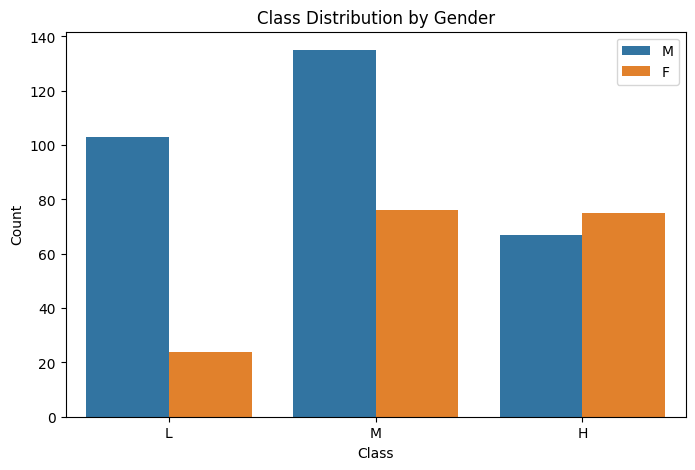

In [ ]:
 ###  클래스(H/M/L)별 남녀 수 비교 ###

plt.figure(figsize=(8, 5))
sns.countplot(x="Class", hue="gender", data=df, order=["L", "M", "H"])
plt.title("Class Distribution by Gender")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
## 남녀 비율 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 클래스별 남녀 학생 수 계산
class_gender_counts = df.groupby("Class")["gender"].value_counts(normalize=True).unstack()

# 비율 시각화
class_gender_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.title("Class-wise Gender Proportion")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.show()


In [ ]:
import scipy.stats as stats
import pandas as pd

# 남녀별 성적 분포 생성
gender_class_counts = pd.crosstab(df['gender'], df['Class'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = stats.chi2_contingency(gender_class_counts)

print(f"Chi-square Statistic: {chi2_stat:.5f}, P-value: {p_value:.5f}")

# 결과 해석
if p_value < 0.05:
    print("✅ 남녀 간 성적(Class) 분포 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ 남녀 간 성적(Class) 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")


Chi-square Statistic: 33.32624, P-value: 0.00000
✅ 남녀 간 성적(Class) 분포 차이가 통계적으로 유의미함 (p < 0.05)


- L,M클래스에서는 남학생의 비율이 압도적으로 많고 H클래스에서는 여학생의 비율이 조금 더 많다.

남/녀 간 성적 평균 차이 확인

In [ ]:
from scipy.stats import shapiro

male_scores = df[df['gender'] == 'M']['Class_numeric']
female_scores = df[df['gender'] == 'F']['Class_numeric']

# 정규성 검정 (Shapiro-Wilk Test)
shapiro_male = shapiro(male_scores)
shapiro_female = shapiro(female_scores)

print(f"남학생 정규성 검정: p-value = {shapiro_male.pvalue:.5f}")
print(f"여학생 정규성 검정: p-value = {shapiro_female.pvalue:.5f}")

# p-value < 0.05이면 정규성 가정이 깨짐 (정규분포 X)


남학생 정규성 검정: p-value = 0.00000
여학생 정규성 검정: p-value = 0.00000


In [ ]:
from scipy.stats import mannwhitneyu

# 남학생과 여학생의 성적 데이터
male_scores = df[df['gender'] == 'M']['Class_numeric']
female_scores = df[df['gender'] == 'F']['Class_numeric']

# Mann-Whitney U-test 수행
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

print(f"Mann-Whitney U-test 결과: U-statistic = {u_stat:.5f}, P-value = {p_value:.5f}")

# p-value 해석
if p_value < 0.05:
    print("✅ 남녀 간 성적 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ 남녀 간 성적 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")


Mann-Whitney U-test 결과: U-statistic = 18818.50000, P-value = 0.00000
✅ 남녀 간 성적 차이가 통계적으로 유의미함 (p < 0.05)


#### 결론 2-1
---
클래스별 남녀 비율을 따져봤을 때와, 성적을 수치화해 남녀학생의 성적 평균(중앙값)을 비교해봤을 때 모두 여학생의 성적이 유의미하게 높음을 확인할 수 있다.

### 2-2 학습 참여 유형별 남녀 비율 비교

<Figure size 1000x500 with 0 Axes>

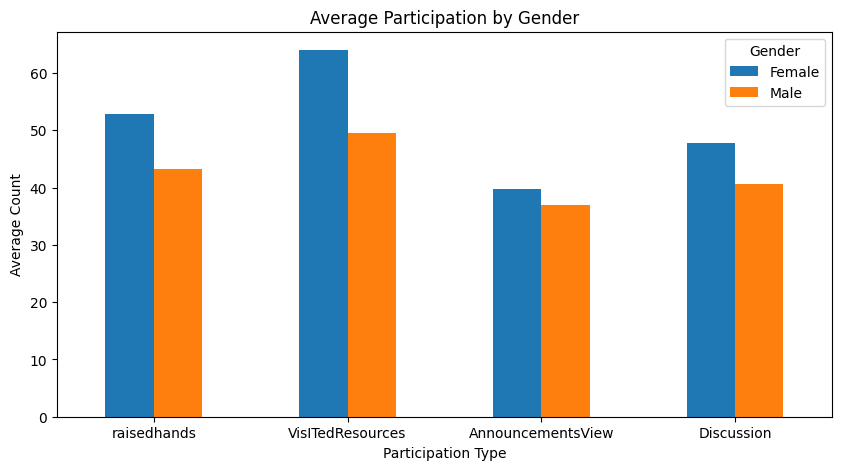

In [ ]:
###학습 참여 유형별 남녀 비율 비교 ###
participation_cols = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]

# 남녀별 평균 참여도 계산
gender_participation = df.groupby("gender")[participation_cols].mean()

# 시각화
plt.figure(figsize=(10, 5))
gender_participation.T.plot(kind="bar", figsize=(10, 5))
plt.title("Average Participation by Gender")
plt.xlabel("Participation Type")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

In [ ]:
from scipy.stats import shapiro

male_scores = df[df['gender'] == 'M']['Class_numeric']
female_scores = df[df['gender'] == 'F']['Class_numeric']

# 정규성 검정 (Shapiro-Wilk Test)
shapiro_male = shapiro(male_scores)
shapiro_female = shapiro(female_scores)

print(f"남학생 정규성 검정: p-value = {shapiro_male.pvalue:.5f}")
print(f"여학생 정규성 검정: p-value = {shapiro_female.pvalue:.5f}")

# p-value < 0.05이면 정규성 가정이 깨짐 (정규분포 X)


남학생 정규성 검정: p-value = 0.00000
여학생 정규성 검정: p-value = 0.00000


p-value < 0.05 로 데이터가 정규성을 만족하지 않기 떄문에 비모수검정 수행해야함

In [ ]:
from scipy.stats import mannwhitneyu

# 남학생과 여학생의 성적 데이터
male_scores = df[df['gender'] == 'M']['Class_numeric']
female_scores = df[df['gender'] == 'F']['Class_numeric']

# Mann-Whitney U-test 수행
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

print(f"Mann-Whitney U-test 결과: U-statistic = {u_stat:.5f}, P-value = {p_value:.5f}")

# p-value 해석
if p_value < 0.05:
    print("✅ 남녀 간 성적 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ 남녀 간 성적 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")


Mann-Whitney U-test 결과: U-statistic = 18818.50000, P-value = 0.00000
✅ 남녀 간 성적 차이가 통계적으로 유의미함 (p < 0.05)


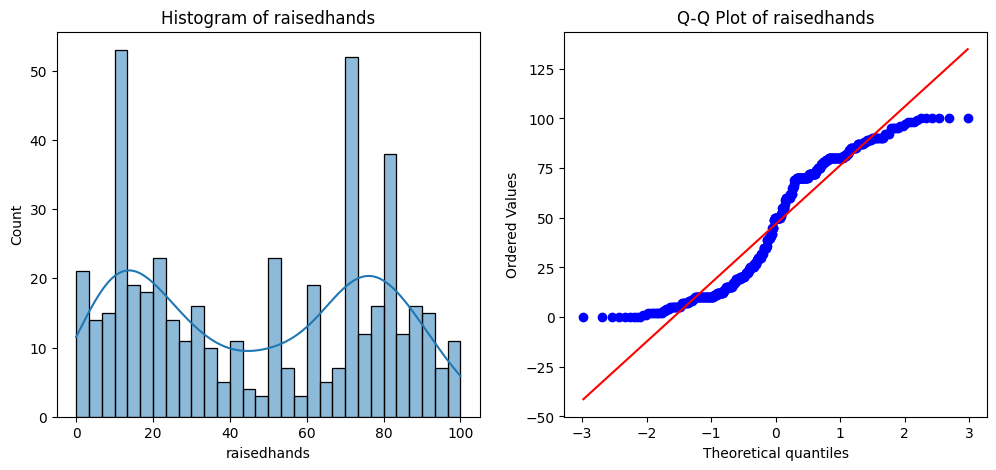

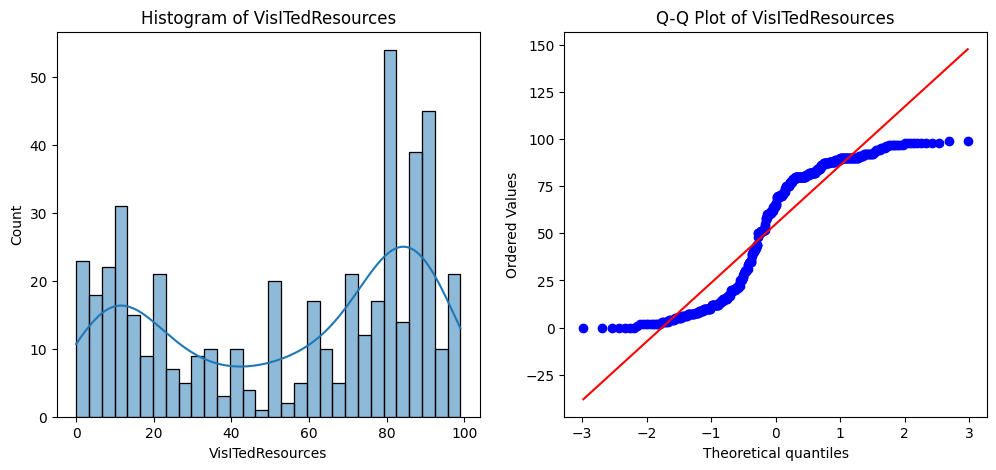

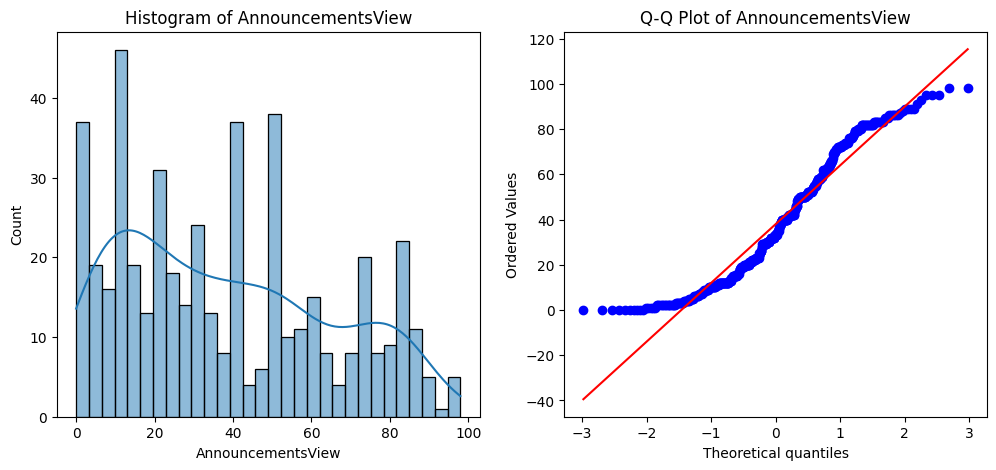

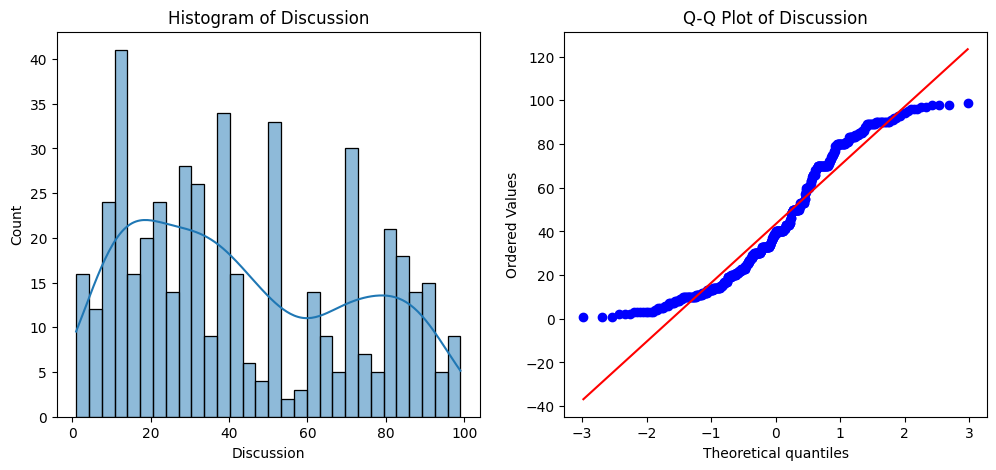

In [ ]:
# 학습 참여도 변수들이 정규성을 만족하는지 확인
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 학습 참여도 변수 리스트
engagement_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

for feature in engagement_features:
    plt.figure(figsize=(12, 5))

    # Histogram (히스토그램)
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")

    # Q-Q Plot (정규성 확인)
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {feature}")

    plt.show()


In [ ]:
from scipy.stats import shapiro

for feature in engagement_features:
    stat, p_value = shapiro(df[feature])
    print(f"{feature} - Shapiro-Wilk Test: p-value = {p_value:.5f}")

    if p_value < 0.05:
        print(f"🚨 {feature}: 정규성을 따르지 않음 (p < 0.05)")
    else:
        print(f"✅ {feature}: 정규성을 만족함 (p >= 0.05)")

raisedhands - Shapiro-Wilk Test: p-value = 0.00000
🚨 raisedhands: 정규성을 따르지 않음 (p < 0.05)
VisITedResources - Shapiro-Wilk Test: p-value = 0.00000
🚨 VisITedResources: 정규성을 따르지 않음 (p < 0.05)
AnnouncementsView - Shapiro-Wilk Test: p-value = 0.00000
🚨 AnnouncementsView: 정규성을 따르지 않음 (p < 0.05)
Discussion - Shapiro-Wilk Test: p-value = 0.00000
🚨 Discussion: 정규성을 따르지 않음 (p < 0.05)


In [ ]:
from scipy.stats import mannwhitneyu

# 학습 행동 변수 리스트
engagement_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

for feature in engagement_features:
    male_scores = df[df['gender'] == 'M'][feature]
    female_scores = df[df['gender'] == 'F'][feature]

    u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

    print(f"\n📌 학습 참여 유형: {feature}")
    print(f"Mann-Whitney U-test 결과: U-statistic = {u_stat:.5f}, P-value = {p_value:.5f}")

    if p_value < 0.05:
        print(f"✅ 남녀 간 {feature} 차이가 통계적으로 유의미함 (p < 0.05)")
    else:
        print(f"❌ 남녀 간 {feature} 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")



📌 학습 참여 유형: raisedhands
Mann-Whitney U-test 결과: U-statistic = 22036.00000, P-value = 0.00147
✅ 남녀 간 raisedhands 차이가 통계적으로 유의미함 (p < 0.05)

📌 학습 참여 유형: VisITedResources
Mann-Whitney U-test 결과: U-statistic = 19982.50000, P-value = 0.00000
✅ 남녀 간 VisITedResources 차이가 통계적으로 유의미함 (p < 0.05)

📌 학습 참여 유형: AnnouncementsView
Mann-Whitney U-test 결과: U-statistic = 24535.00000, P-value = 0.14113
❌ 남녀 간 AnnouncementsView 차이가 통계적으로 유의미하지 않음 (p >= 0.05)

📌 학습 참여 유형: Discussion
Mann-Whitney U-test 결과: U-statistic = 23004.00000, P-value = 0.01178
✅ 남녀 간 Discussion 차이가 통계적으로 유의미함 (p < 0.05)


#### 결론 2-2
---
여학생들의 학습 참여도가 남학생의 참여도보다 전반적으로 높음을 확인해볼 수 있다. 학습 참여도별 남녀 비율을 확인해봤을 때, 손들기, 외부자료 방문하기, 토론하기에서 여학생이 일반적으로 더 많이 참여하는 것을 확인할 수 있었으나, 공지확인 부분에서는 이번 데이터셋에 한해서만 나타나는 현상일수 있음을 유의해야한다

### 2-2+ 성적이 좋은 학생들안의 패턴 확인

<Figure size 1000x500 with 0 Axes>

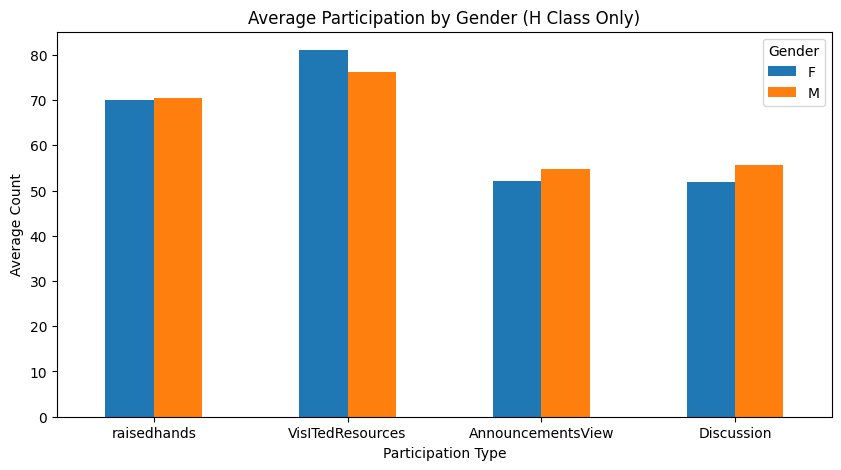

In [ ]:
### H클래스 내 남녀 학습 패턴 차이 분석 ###
h_class_df = df[df["Class"] == "H"]

# H클래스 남녀별 평균 참여도 계산
h_class_gender_participation = h_class_df.groupby("gender")[participation_cols].mean()

# 시각화
plt.figure(figsize=(10, 5))
h_class_gender_participation.T.plot(kind="bar", figsize=(10, 5))
plt.title("Average Participation by Gender (H Class Only)")
plt.xlabel("Participation Type")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.show()

In [ ]:
for feature in engagement_features:
    male_scores = df[(df['gender'] == 'M') & (df['Class'] == 'H')][feature]
    female_scores = df[(df['gender'] == 'F') & (df['Class'] == 'H')][feature]

    u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

    print(f"\n📌 H 클래스 내 학습 패턴 차이 분석 - {feature}")
    print(f"Mann-Whitney U-test 결과: U-statistic = {u_stat:.5f}, P-value = {p_value:.5f}")

    if p_value < 0.05:
        print(f"✅ H클래스 내 남녀 간 {feature} 차이가 통계적으로 유의미함 (p < 0.05)")
    else:
        print(f"❌ H클래스 내 남녀 간 {feature} 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")



📌 H 클래스 내 학습 패턴 차이 분석 - raisedhands
Mann-Whitney U-test 결과: U-statistic = 2462.50000, P-value = 0.83944
❌ H클래스 내 남녀 간 raisedhands 차이가 통계적으로 유의미하지 않음 (p >= 0.05)

📌 H 클래스 내 학습 패턴 차이 분석 - VisITedResources
Mann-Whitney U-test 결과: U-statistic = 2338.00000, P-value = 0.47645
❌ H클래스 내 남녀 간 VisITedResources 차이가 통계적으로 유의미하지 않음 (p >= 0.05)

📌 H 클래스 내 학습 패턴 차이 분석 - AnnouncementsView
Mann-Whitney U-test 결과: U-statistic = 2689.00000, P-value = 0.47182
❌ H클래스 내 남녀 간 AnnouncementsView 차이가 통계적으로 유의미하지 않음 (p >= 0.05)

📌 H 클래스 내 학습 패턴 차이 분석 - Discussion
Mann-Whitney U-test 결과: U-statistic = 2729.00000, P-value = 0.37716
❌ H클래스 내 남녀 간 Discussion 차이가 통계적으로 유의미하지 않음 (p >= 0.05)


#### 결론 2-2+
---
- H클래스내에서 남녀학생들의 수업 참여 형태 비교 결과 오직 VisitedResources에서만 여학생의 참여도가 더 높게 나오고 그 외에는 남학생의 참여도가 더 높다

> 여학생들이 남학생들보다 외부 자료를 더 많이 활용하는 경향이 있는 듯하지만 남녀 간 특별한 학습 참여 방식의 차이는 발견하지 못했음

### 2-3 학년별 남녀 비율 비교

<ipython-input-84-42bb6d9df6de>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="StageID", y="Class_numeric", hue="gender", data=df, palette="muted", ci=None)


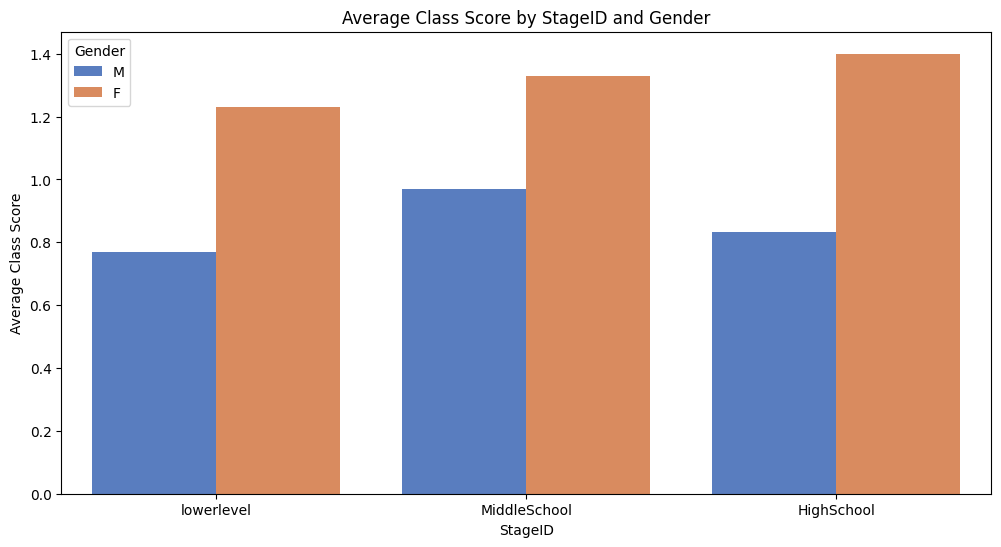

In [ ]:

# StageID별 성별 평균 성적 비교 (barplot이 평균을 자동으로 계산)
df["Class_numeric"] = df["Class_numeric"].astype(float)
plt.figure(figsize=(12, 6))
sns.barplot(x="StageID", y="Class_numeric", hue="gender", data=df, palette="muted", ci=None)
plt.title("Average Class Score by StageID and Gender")
plt.xlabel("StageID")
plt.ylabel("Average Class Score")
plt.legend(title="Gender")
plt.show()


In [ ]:
print(df["Class_numeric"].unique)

<bound method Series.unique of 0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
475    0.0
476    1.0
477    1.0
478    0.0
479    0.0
Name: Class_numeric, Length: 480, dtype: float64>


-

In [ ]:
df.groupby('StageID')['gender'].value_counts()

StageID       gender
HighSchool    M          18
              F          15
MiddleSchool  M         166
              F          82
lowerlevel    M         121
              F          78
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

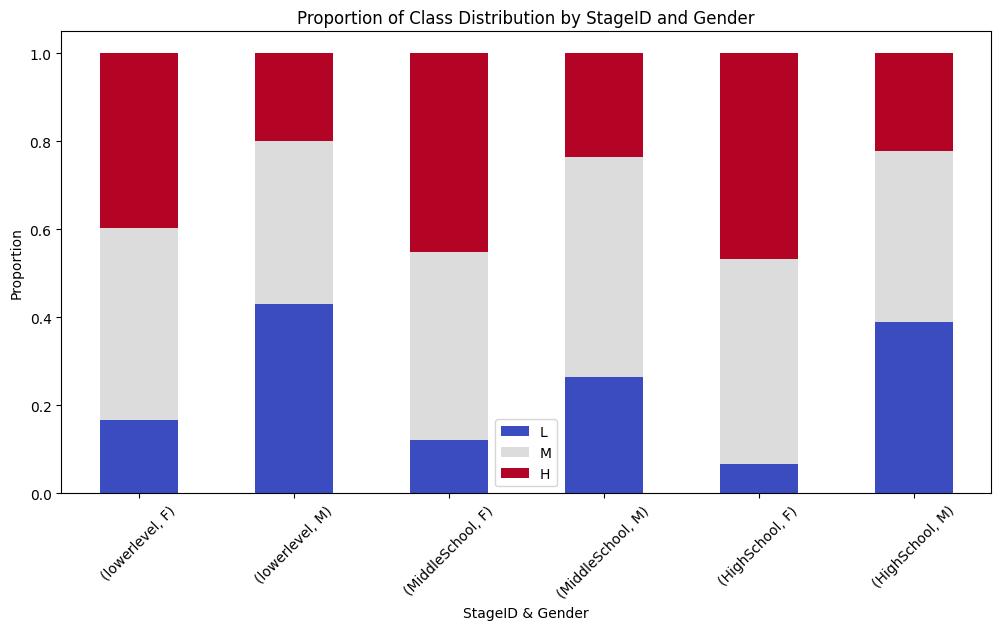

In [ ]:
# StageID 순서 지정
stage_order = ["lowerlevel", "MiddleSchool", "HighSchool"]

# StageID & Gender별 학생 수 비율 계산
stage_gender_counts = df.groupby(["StageID", "gender"])["Class"].value_counts(normalize=True).unstack()

# StageID 순서 맞추기
stage_gender_counts = stage_gender_counts.reindex(stage_order, level=0)

# 시각화: StageID별 성별 성적 비율 비교 (올바른 순서 적용)
plt.figure(figsize=(12, 6))
stage_gender_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.title("Proportion of Class Distribution by StageID and Gender")
plt.xlabel("StageID & Gender")
plt.ylabel("Proportion")
plt.legend()
plt.xticks(rotation=45)
plt.show()


- 비율로 살펴보았을 때, 초중고등학교 모두 여학생의 성적이 높게 나왔고, 고등학교로 갈수록 성적이 상향되는 모습을 확인할 수 있음

In [ ]:
from scipy.stats import kruskal

# 학년별 성적 데이터 추출
lowerlevel_scores = df[df['StageID'] == 'lowerlevel']['Class_numeric']
middleschool_scores = df[df['StageID'] == 'MiddleSchool']['Class_numeric']
highschool_scores = df[df['StageID'] == 'HighSchool']['Class_numeric']

# Kruskal-Wallis H-test 수행
h_stat, p_value = kruskal(lowerlevel_scores, middleschool_scores, highschool_scores)

print(f"Kruskal-Wallis H-test 결과: H-statistic = {h_stat:.5f}, P-value = {p_value:.5f}")

# 결과 해석
if p_value < 0.05:
    print("✅ 초등 → 중등 → 고등으로 갈수록 성적이 상승하는 경향이 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ 학년에 따른 성적 차이는 통계적으로 유의미하지 않음 (p >= 0.05)")


Kruskal-Wallis H-test 결과: H-statistic = 3.93239, P-value = 0.13999
❌ 학년에 따른 성적 차이는 통계적으로 유의미하지 않음 (p >= 0.05)


#### **결론2-3**

이 데이터셋에서는 여학생의 성적이 남학생보다 높은 경향이 있고, 학년이 올라갈수록 성적이 향상되는 패턴을 확인할 수 있다.
그러나 통계적 검정 결과(p ≥ 0.05)에 따르면, 이 차이가 유의미하지 않으므로 이러한 패턴을 일반화하기는 어렵다.

▶ 위와 같은 차이는 표본의 특성에 의해 나타났을 가능성이 있으며, 더 많은 데이터를 수집하거나 추가적인 검증이 필요해보임

----

## 가설3 과목과 성적

## 과목선택에 영향을 끼치는 요인들을 먼저 알아보기....

- 성별
- 학년
- 국적

### 3-1. 성별에 따라 과목 선택도 달라질까?

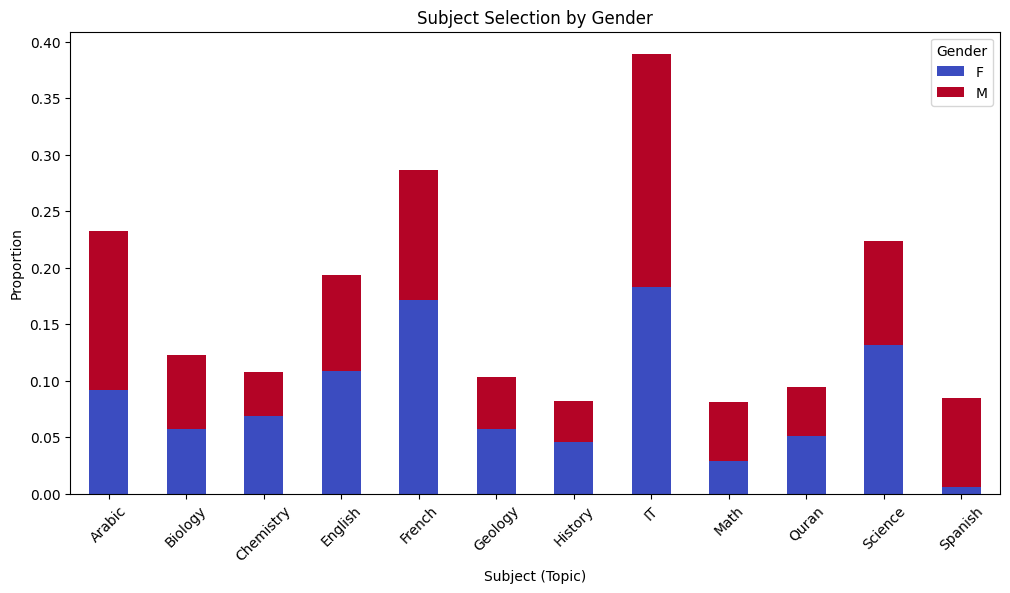

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 성별(Gender)과 과목(Topic) 간 관계 시각화 (누적 막대 그래프)
gender_topic_counts = pd.crosstab(df['gender'], df['Topic'], normalize='index')

gender_topic_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Subject Selection by Gender")
plt.xlabel("Subject (Topic)")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()


뚜렷한 패턴이  보이지 않아서 문과 / 이과로 그룹화

<Figure size 800x500 with 0 Axes>

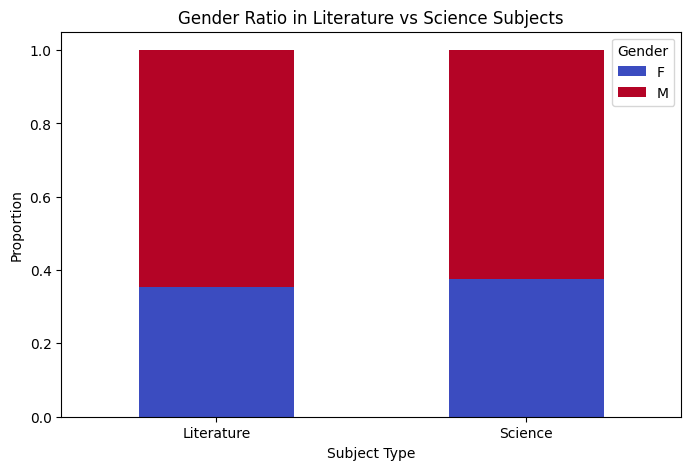

In [ ]:
# 문과과목 & 이과과목 분류
literature_subjects = ["English", "Quran", "Spanish", "French", "History", "Arabic"]
science_subjects = ["IT", "Math", "Science", "Biology", "Chemistry", "Geology"]

# 과목별 유형 할당
df["Subject_Type"] = df["Topic"].apply(lambda x: "Literature" if x in literature_subjects else "Science" if x in science_subjects else "Other")

# 문과 vs 이과 내에서 남녀 학생 수 비율 계산
subject_gender_ratio = df.groupby(["Subject_Type", "gender"]).size().unstack()

# 각 과목 유형 내에서 남녀 비율 계산 (정규화)
subject_gender_ratio = subject_gender_ratio.div(subject_gender_ratio.sum(axis=1), axis=0)

# 시각화: 문과 vs 이과 내 남녀 비율 비교
plt.figure(figsize=(8, 5))
subject_gender_ratio.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Gender Ratio in Literature vs Science Subjects")
plt.xlabel("Subject Type")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()


#### 결론3-1
---
과목을 선택하는 것에 있어서 남녀비율의 차이가 크지 않다

### 3-2. 학년에 따라 과목 선택도 달라질까?

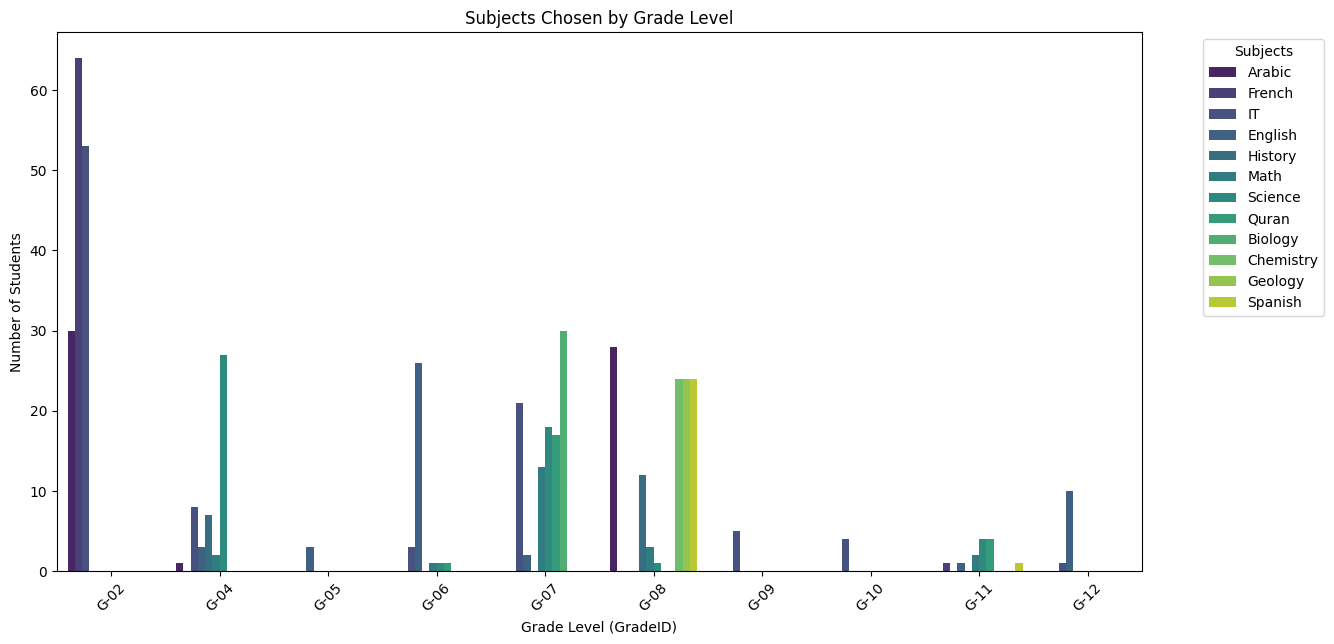

In [ ]:
# 학년(GradeID)별 과목(Topic) 선택 분포 확인
grade_topic_counts = df.groupby(['GradeID', 'Topic']).size().reset_index(name='Count')

# 학년 순서 정렬
grade_order = sorted(df['GradeID'].unique())  # 학년을 오름차순 정렬

# 막대 그래프 시각화 (학년별 선택 과목 비교)
plt.figure(figsize=(14, 7))
sns.barplot(x='GradeID', y='Count', hue='Topic', data=grade_topic_counts, palette="viridis")

plt.title("Subjects Chosen by Grade Level")
plt.xlabel("Grade Level (GradeID)")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)  # 학년 레이블이 겹치지 않도록 조정
plt.legend(title="Subjects", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# 학년(GradeID)별 선택한 과목 목록 확인
grade_topic_table = df.groupby('GradeID')['Topic'].unique().reset_index()

# 학년별 과목 리스트 출력
grade_topic_table

,GradeID,Topic
0,G-02,"[IT, French, Arabic]"
1,G-04,"[IT, Math, English, Science, Arabic, History]"
2,G-05,[English]
3,G-06,"[IT, Science, Math, Quran, English]"
4,G-07,"[Math, IT, Science, English, Quran, Biology]"
5,G-08,"[Math, Arabic, Science, Spanish, Chemistry, Ge..."
6,G-09,[IT]
7,G-10,[IT]
8,G-11,"[Science, Quran, Spanish, English, Math, French]"
9,G-12,"[English, IT]"


In [ ]:
df.groupby('StageID')['GradeID'].value_counts()

StageID       GradeID
HighSchool    G-11        13
              G-12        11
              G-09         5
              G-10         4
MiddleSchool  G-08       116
              G-07       100
              G-06        32
lowerlevel    G-02       147
              G-04        48
              G-05         3
              G-07         1
Name: count, dtype: int64

G2~5: 초등학생

G6~8: 중학생

G9~12: 고등학생

In [ ]:
# lowerlevel인데 G-07인 학생의 정보를 필터링하여 확인
outlier_student = df[(df['StageID'] == 'lowerlevel') & (df['GradeID'] == 'G-07')]

# 결과 출력
outlier_student

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject Type,Class_numeric,Subject_Type,Region
32,F,KW,KuwaIT,lowerlevel,G-07,A,IT,F,Father,2,...,10,50,Yes,Good,Above-7,0,Science,0.0,Science,Middle East


In [ ]:
# 교육 수준(StageID)별 과목(Topic) 선택 횟수를 피벗 테이블 형태로 정리
stage_topic_pivot = df.groupby(['StageID', 'Topic']).size().unstack().fillna(0)

# 데이터프레임 출력
stage_topic_pivot

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
StageID,,,,,,,,,,,,
HighSchool,0.0,0.0,0.0,11.0,1.0,0.0,0.0,10.0,2.0,4.0,4.0,1.0
MiddleSchool,28.0,30.0,24.0,28.0,0.0,24.0,12.0,23.0,17.0,18.0,20.0,24.0
lowerlevel,31.0,0.0,0.0,6.0,64.0,0.0,7.0,62.0,2.0,0.0,27.0,0.0


In [ ]:
# 학년(StageID)별로 특정 과목을 더 많이 선택하는지 확인

#학년(StageID)과 과목(Topic) 간 관계 분석 (카이제곱 검정)
stage_topic_counts = pd.crosstab(df['StageID'], df['Topic'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(stage_topic_counts)

print(f"Chi-square Statistic: {chi2_stat:.5f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ 학년에 따라 과목 선택이 통계적으로 유의미한 차이를 보임 (p < 0.05)")
else:
    print("❌ 학년과 과목 선택 간 차이는 통계적으로 유의미하지 않음 (p >= 0.05)")


Chi-square Statistic: 275.88027, P-value: 0.00000
✅ 학년에 따라 과목 선택이 통계적으로 유의미한 차이를 보임 (p < 0.05)


어떤 과목에서 학년별 차이가 가장 큰가?

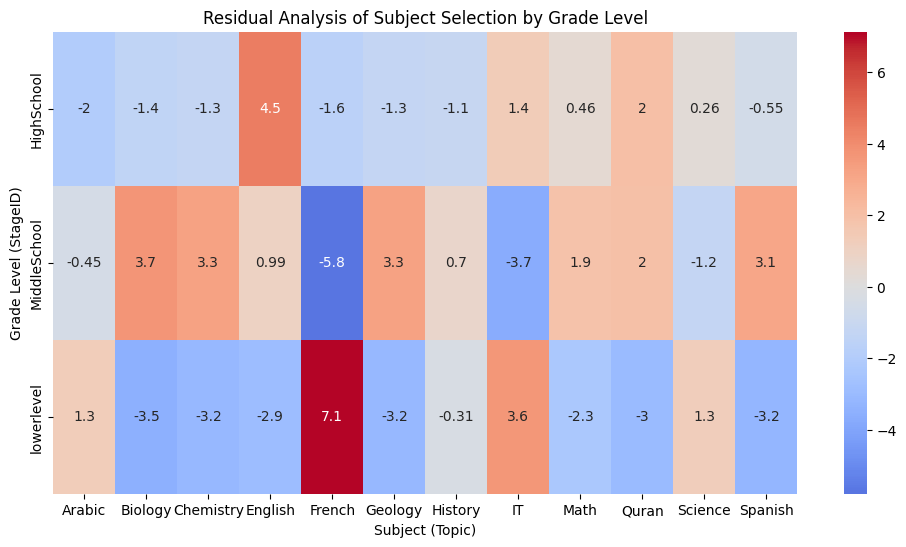

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 학년(StageID)과 과목(Topic) 간 카이제곱 검정 후 잔차 분석
stage_topic_counts = pd.crosstab(df['StageID'], df['Topic'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(stage_topic_counts)

# 잔차 계산 (관측값 - 기대값) / sqrt(기대값)
residuals = (stage_topic_counts - expected) / np.sqrt(expected)

# 잔차를 히트맵으로 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0)
plt.title("Residual Analysis of Subject Selection by Grade Level")
plt.xlabel("Subject (Topic)")
plt.ylabel("Grade Level (StageID)")
plt.show()


- 잔차가 크게 양수이면 해당 학년이 그 과목을 기대보다 훨씬 많이 선택한다고 해석할 수 있음.

색상이 짙어질수록 유의미한 차이가 있는 과목

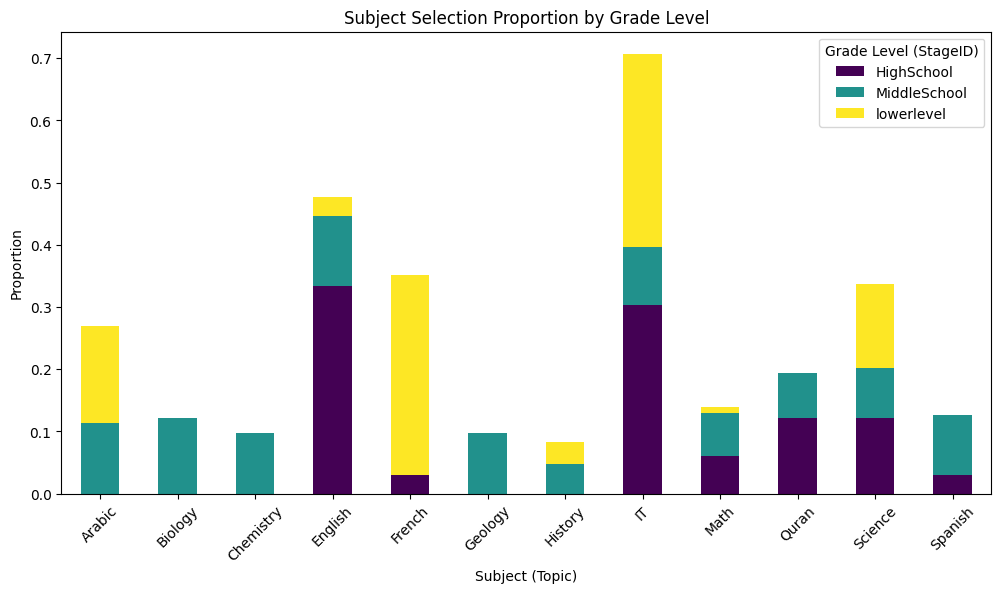

In [ ]:
# 학년(StageID)별 과목 선택 비율 (누적 막대 그래프)
stage_topic_proportion = pd.crosstab(df['StageID'], df['Topic'], normalize='index')

stage_topic_proportion.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Subject Selection Proportion by Grade Level")
plt.xlabel("Subject (Topic)")
plt.ylabel("Proportion")
plt.legend(title="Grade Level (StageID)")
plt.xticks(rotation=45)
plt.show()


#### 결론3-2
---
학년에 따라서 선택하는 과목이 다르긴 하지만, 선택하는 과목에 있어서 특정한 패턴은 발견할 수 없어서 학년에 따라 선택하는 과목이 달라진다와 달라지지 않는다로 단정지을 수 없다.

### 3-3. 국적에 따라 과목 선택도 달라질까?

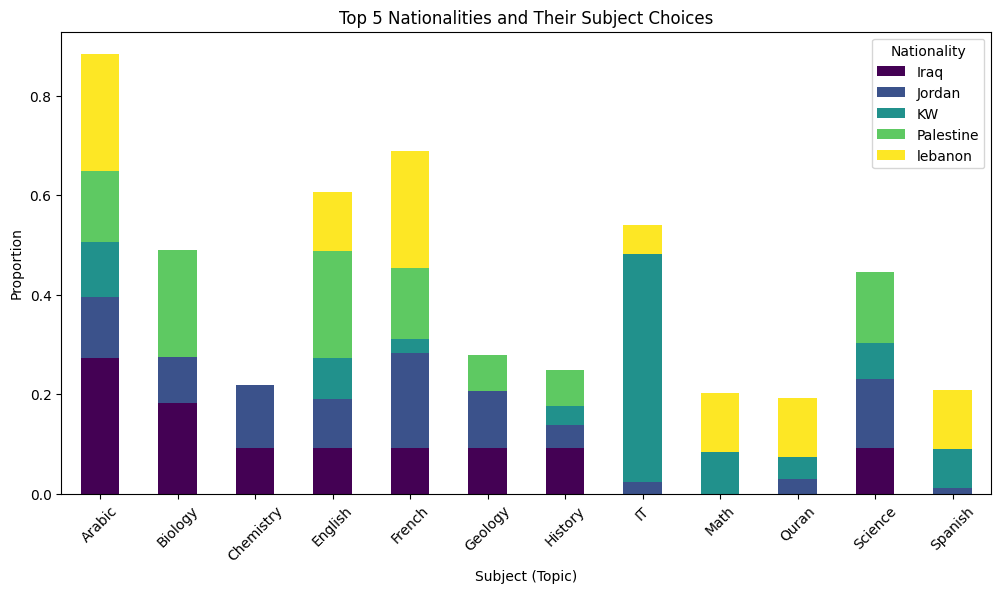

In [ ]:
#국적에 따라 선택하는 과목이 다를까? 상위 5개
# 국적(Nationality)과 과목(Topic) 간 관계 시각화 (상위 5개 국적)
top_5_nationalities = df['NationalITy'].value_counts().index[:5]
df_filtered = df[df['NationalITy'].isin(top_5_nationalities)]

nationality_topic_counts = pd.crosstab(df_filtered['NationalITy'], df_filtered['Topic'], normalize='index')

nationality_topic_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Top 5 Nationalities and Their Subject Choices")
plt.xlabel("Subject (Topic)")
plt.ylabel("Proportion")
plt.legend(title="Nationality")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 국적(Nationality)과 과목(Topic) 간 관계 분석 (카이제곱 검정)
nationality_topic_counts = pd.crosstab(df['NationalITy'], df['Topic'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(nationality_topic_counts)

print(f"Chi-square Statistic: {chi2_stat:.5f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ 국적에 따라 과목 선택이 통계적으로 유의미한 차이를 보임 (p < 0.05)")
else:
    print("❌ 국적과 과목 선택 간 차이는 통계적으로 유의미하지 않음 (p >= 0.05)")


Chi-square Statistic: 414.23614, P-value: 0.00000
✅ 국적에 따라 과목 선택이 통계적으로 유의미한 차이를 보임 (p < 0.05)


#### 결론 3-3
---
국적에 따라 과목 선택이 달라지기도 하지만, 이 또한 학년과 과목의 선택처럼 특정한 패턴을 확인할 수 없었다. 또한, 국적 데이터가 특정 지역의 데이터가 많은 데이터이기 때문에 해석에 유의할 필요가 있다.

### 3-4. 선택한 과목이 성적에 영향을 미치는가?
- 과목별 성적 분포 차이 확인

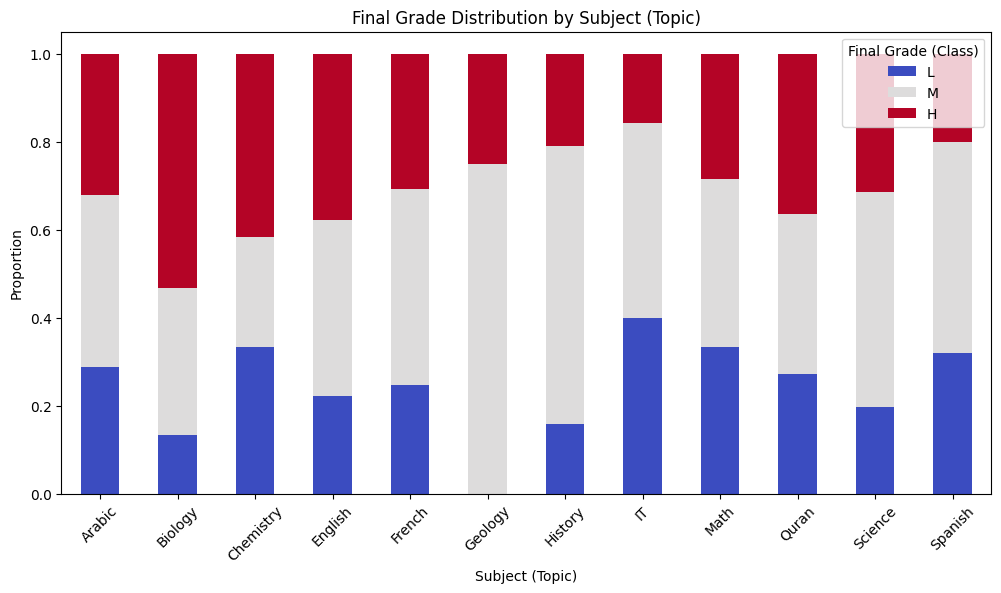

In [ ]:
# 과목별 성적 분포 (누적 막대 그래프)
topic_class_counts = pd.crosstab(df['Topic'], df['Class'], normalize='index')

topic_class_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Final Grade Distribution by Subject (Topic)")
plt.xlabel("Subject (Topic)")
plt.ylabel("Proportion")
plt.legend(title="Final Grade (Class)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import kruskal

# 과목별 성적 차이 분석 (Kruskal-Wallis Test)
subject_groups = [df[df['Topic'] == topic]['Class_numeric'] for topic in df['Topic'].unique()]
h_stat, p_value = kruskal(*subject_groups)

print(f"Kruskal-Wallis H-test 결과: H-statistic = {h_stat:.5f}, P-value = {p_value:.5f}")

if p_value < 0.05:
    print("✅ 선택한 과목에 따라 성적이 유의미하게 차이남 (p < 0.05)")
else:
    print("❌ 선택한 과목에 따른 성적 차이는 통계적으로 유의미하지 않음 (p >= 0.05)")


Kruskal-Wallis H-test 결과: H-statistic = 25.50384, P-value = 0.00769
✅ 선택한 과목에 따라 성적이 유의미하게 차이남 (p < 0.05)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD Test 수행
tukey_result = pairwise_tukeyhsd(df['Class_numeric'], df['Topic'], alpha=0.05)

# 결과 출력
print(tukey_result)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Arabic   Biology   0.3661 0.5394 -0.1768   0.909  False
   Arabic Chemistry   0.0494    1.0 -0.5367  0.6356  False
   Arabic   English   0.1217 0.9996 -0.3575  0.6008  False
   Arabic    French   0.0276    1.0 -0.4077   0.463  False
   Arabic   Geology   0.2161  0.988   -0.37  0.8022  False
   Arabic   History   0.0187    1.0 -0.6199  0.6573  False
   Arabic        IT   -0.276 0.5074 -0.6773  0.1253  False
   Arabic      Math  -0.0815    1.0 -0.6967  0.5336  False
   Arabic     Quran    0.057    1.0 -0.5477  0.6618  False
   Arabic   Science   0.0837    1.0 -0.3791  0.5466  False
   Arabic   Spanish  -0.1539 0.9993 -0.7316  0.4238  False
  Biology Chemistry  -0.3167 0.9194 -0.9797  0.3463  False
  Biology   English  -0.2444 0.9618 -0.8151  0.3262  False
  Biology    French  -0.3385  0.637 -0.8728  0.1959  Fal

#### 결론 3-4
---
과목별 성적 차이가 있다는 anova결과가 있었지만 사후 검정 결과에서 오직 Biology와 IT간에서만 유의미한 차이를 확인할 수 있음.
(Biology를 수강하는 학생들이 it를 수강하는 학생들보다 평균적으로 성적이 더 높음)
이는 다른 과목 간 성적차이는 우연일 가능성이 크다라는 뜻으로, 특정 과목을 선택하는것이 성적에 영향을 준다고 결론내리기는 어렵다고 해석할 수 있음